# 機械学習入門授業前課題2 住宅価格の予測

【問題1】練習のために特徴量の選択

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
target_feat = ['GrLivArea', 'YearBuilt']
target = ['SalePrice']
X = train[target_feat]
y = train[target]

In [3]:
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [4]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


【問題2】線形回帰による推定と評価

In [5]:
# 今回の特徴量について分析
X.isnull().sum()

GrLivArea    0
YearBuilt    0
dtype: int64

In [6]:
check_train = pd.concat([X, y], axis=1)
check_train

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


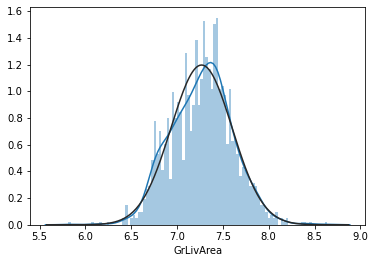

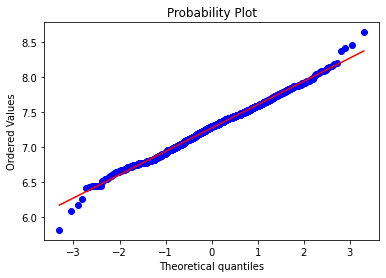

In [7]:
sns.distplot(check_train['GrLivArea'].apply(np.log), bins=100, fit=norm)
fig = plt.figure()
res = stats.probplot(check_train['GrLivArea'].apply(np.log), plot=plt)

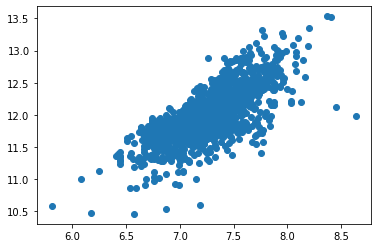

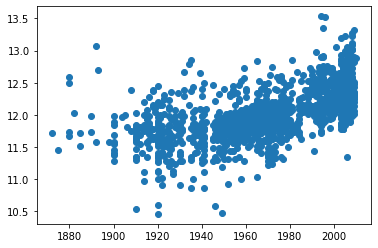

In [8]:
plt.scatter(x=check_train['GrLivArea'].apply(np.log), y=check_train['SalePrice'].apply(np.log))
plt.show()
plt.scatter(x=check_train['YearBuilt'], y=check_train['SalePrice'].apply(np.log))
plt.show()

In [9]:
# 簡単な分析から、GrLivAreaとSalePriceに対数を取る
check_train['GrLivArea'] = check_train['GrLivArea'].apply(np.log)
check_train['SalePrice'] = check_train['SalePrice'].apply(np.log)

In [10]:
check_train

,GrLivArea,YearBuilt,SalePrice
0,7.444249,2003,12.247694
1,7.140453,1976,12.109011
2,7.487734,2001,12.317167
3,7.448334,1915,11.849398
4,7.695303,2000,12.429216
...,...,...,...
1455,7.406711,1999,12.072541
1456,7.636752,1978,12.254863
1457,7.757906,1941,12.493130
1458,6.982863,1950,11.864462


In [11]:
# データ分割
train, test = train_test_split(check_train, test_size=0.25)
train_y = train['SalePrice']
test_y = test['SalePrice']
train.drop(columns='SalePrice', axis=1, inplace=True)
test.drop(columns='SalePrice', axis=1, inplace=True)
# 以下ndarrayの入力データ達
train_y = np.array(train_y)
test_y = np.array(test_y)
train_X = np.array(train)
test_X = np.array(test)

/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
# 線形回帰での学習・推定
LR = LinearRegression()
LR.fit(train_X, train_y)
LR_result = LR.predict(test_X)
LR_result

array([12.16186003, 11.66619101, 12.3735405 , 12.50795066, 12.74456422,
       12.12828428, 11.71414425, 12.14414538, 11.97659378, 12.2051905 ,
       12.12594515, 12.15646337, 12.29008828, 11.68305943, 11.54820645,
       11.79979756, 11.65027152, 11.74507456, 12.5857539 , 11.54917927,
       12.33524268, 11.74505396, 11.95716751, 11.70495076, 12.46049447,
       11.74875185, 11.27011275, 11.3572301 , 11.92455031, 12.04990246,
       11.92553248, 12.27425568, 11.89309424, 11.73585511, 11.77070074,
       12.233507  , 11.67651035, 11.75551057, 12.36473153, 12.24847551,
       12.37690117, 11.39910676, 12.10834086, 12.31701302, 12.86292401,
       12.22490259, 11.71285139, 12.29940094, 12.35391536, 11.77337786,
       11.71416412, 12.23575794, 12.16633112, 12.18708858, 11.67716486,
       12.35998748, 11.77997159, 11.61218028, 12.50024498, 12.35138713,
       11.64347056, 12.34383863, 11.88061606, 11.95725725, 11.93256706,
       11.95229265, 11.7707185 , 12.36774332, 11.98179665, 11.85

In [13]:
# 評価：平均二乗誤差→値が0に近ければ近いほど良い
MSE = metrics.mean_squared_error(test_y, LR_result)
print('平均二乗誤差：{}'.format(MSE))

平均二乗誤差：0.04878986096935127


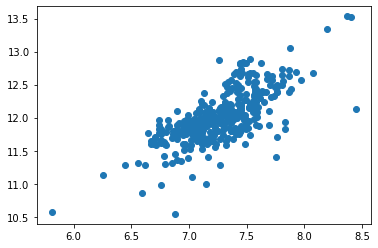

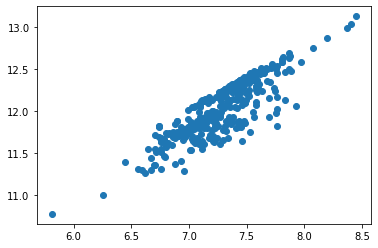

In [14]:
# 可視化, 正解データの場合
plt.scatter(x=test['GrLivArea'], y=test_y)
plt.show()
# 可視化、予測データの場合
plt.scatter(x=test['GrLivArea'], y=LR_result)
plt.show()

【問題3】手法の比較

In [15]:
result_list = []

平均二乗誤差：0.04878986096935127


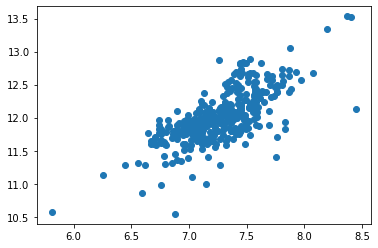

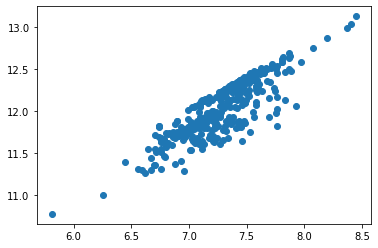

In [16]:
# 線形回帰での学習・推定
LR = LinearRegression()
LR.fit(train_X, train_y)
LR_result = LR.predict(test_X)

MSE = metrics.mean_squared_error(test_y, LR_result)
print('平均二乗誤差：{}'.format(MSE))
result_list.append(MSE)

# 可視化, 正解データの場合
plt.scatter(x=test['GrLivArea'], y=test_y)
plt.show()
# 可視化、予測データの場合
plt.scatter(x=test['GrLivArea'], y=LR_result)
plt.show()

平均二乗誤差：0.10938407164681388


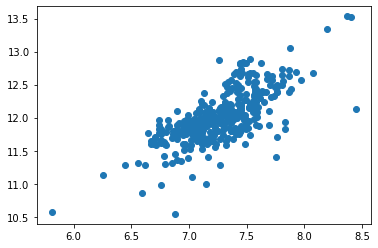

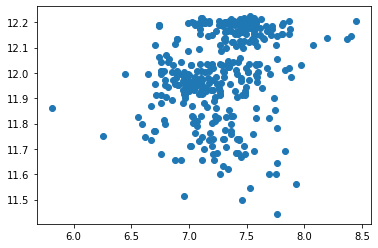

In [17]:
# SVMでの学習・推定
SVM = SVR()
SVM.fit(train_X, train_y)
SVM_result = SVM.predict(test_X)

SVM = metrics.mean_squared_error(test_y, SVM_result)
print('平均二乗誤差：{}'.format(SVM))
result_list.append(SVM)

# 可視化, 正解データの場合
plt.scatter(x=test['GrLivArea'], y=test_y)
plt.show()
# 可視化、予測データの場合
plt.scatter(x=test['GrLivArea'], y=SVM_result)
plt.show()

平均二乗誤差：0.06017579500533158


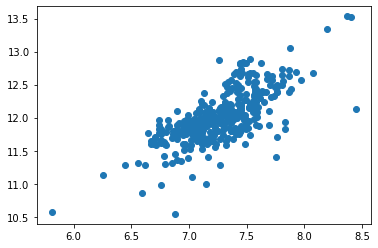

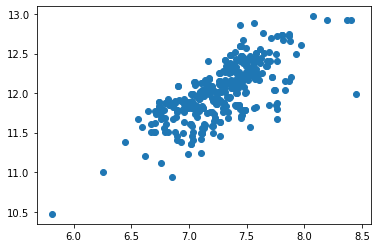

In [18]:
# 決定木での学習・推定
DT = DecisionTreeRegressor()
DT.fit(train_X, train_y)
DT_result = DT.predict(test_X)

MSE = metrics.mean_squared_error(test_y, DT_result)
print('平均二乗誤差：{}'.format(MSE))
result_list.append(MSE)

# 可視化, 正解データの場合
plt.scatter(x=test['GrLivArea'], y=test_y)
plt.show()
# 可視化、予測データの場合
plt.scatter(x=test['GrLivArea'], y=DT_result)
plt.show()

平均二乗誤差：0.04812389944175795


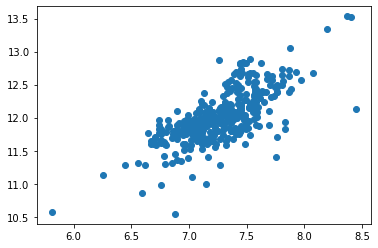

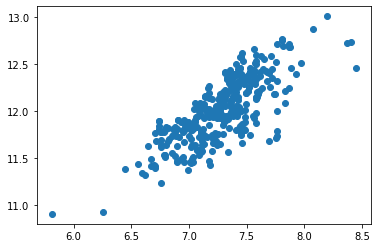

In [19]:
# ランダムフォレストでの学習・推定
RF = RandomForestRegressor()
RF.fit(train_X, train_y)
RF_result = RF.predict(test_X)

MSE = metrics.mean_squared_error(test_y, RF_result)
print('平均二乗誤差：{}'.format(MSE))
result_list.append(MSE)

# 可視化, 正解データの場合
plt.scatter(x=test['GrLivArea'], y=test_y)
plt.show()
# 可視化、予測データの場合
plt.scatter(x=test['GrLivArea'], y=RF_result)
plt.show()

In [20]:
result_df = pd.DataFrame([])
result_df['MSE'] = result_list
result_df.rename(index={0:'LinearRegression', 1:'SVM', 2:'DecisionTree', 3:'RandomForest'}, inplace=True)

In [21]:
result_df

,MSE
LinearRegression,0.048790
SVM,0.109384
DecisionTree,0.060176
RandomForest,0.048124


考察：<br>
今回の評価指標である平均二乗誤差の値として、最も精度が良かった手法はランダムフォレストとなった。<br>
しかし、結果の散布図を比較した時、なんとなく直感的に元の分布に近い印象を与えられたのは決定木の手法であった。<br>
ランダムフォレストは、指標としての評価は良かったものの、結果を可視化してみると全体的に中央に値が集まっているような<br>
分布になっており、それが違和感の正体だと考えている。<br>

【問題4】（アドバンス課題）他の特徴量も使用しての学習

In [22]:
# データフレームを渡して各手法で学習・評価・可視化する関数
def all_regression(df, test_size=0.25, target='SalePrice'):
    result_list = []
    result_df = pd.DataFrame([])
    # データ分割
    train, test = train_test_split(df, test_size=test_size)
    train_y = train[target]
    test_y = test[target]
    train.drop(columns=target, axis=1, inplace=True)
    test.drop(columns=target, axis=1, inplace=True)
    # 以下ndarrayの入力データ達
    train_y = np.array(train_y)
    test_y = np.array(test_y)
    train_X = np.array(train)
    test_X = np.array(test)
    
    # 線形回帰
    LR = LinearRegression()
    LR.fit(train_X, train_y)
    LR_result = LR.predict(test_X)
    LR_MSE = metrics.mean_squared_error(test_y, LR_result)
    result_list.append(LR_MSE)
    
    # SVM
    SVM = SVR()
    SVM.fit(train_X, train_y)
    SVM_result = SVM.predict(test_X)
    SVM_MSE = metrics.mean_squared_error(test_y, SVM_result)
    result_list.append(SVM_MSE)
    
    # 決定木
    DT = DecisionTreeRegressor()
    DT.fit(train_X, train_y)
    DT_result = DT.predict(test_X)
    DT_MSE = metrics.mean_squared_error(test_y, DT_result)
    result_list.append(DT_MSE)
    dt_importance = DT.feature_importances_
    
    # ランダムフォレスト
    RF = RandomForestRegressor()
    RF.fit(train_X, train_y)
    RF_result = RF.predict(test_X)
    RF_MSE = metrics.mean_squared_error(test_y, RF_result)
    result_list.append(RF_MSE)
    rf_importance = RF.feature_importances_
    
    result_df['MSE'] = result_list
    result_df.rename(index={0:'LinearRegression', 1:'SVM', 2:'DecisionTree', 3:'RandomForest'}, inplace=True)
    
    return result_df, dt_importance, rf_importance

In [23]:
# ここから再度EDAしていく（前回のEDA結果も使っていく）
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [24]:
# 欠損値が何パーセント含まれるかを確認する。
null_ratio = pd.DataFrame(train.isnull().count(), columns=['total'])
null_ratio['missing'] = 0
for i, k in enumerate(train.isnull().sum()):
    null_ratio['missing'][i] = k
null_ratio['missing_ratio'] = null_ratio['missing'] / null_ratio['total']
null_ratio.sort_values('missing_ratio', ascending=False).head(20)

,total,missing,missing_ratio
PoolQC,1460,1453,0.995205
MiscFeature,1460,1406,0.963014
Alley,1460,1369,0.937671
Fence,1460,1179,0.807534
FireplaceQu,1460,690,0.472603
LotFrontage,1460,259,0.177397
GarageYrBlt,1460,81,0.055479
GarageCond,1460,81,0.055479
GarageType,1460,81,0.055479
GarageFinish,1460,81,0.055479


In [25]:
# 5つ以上欠損値がある特徴量（列）は削除する。
we_should_delete = null_ratio[null_ratio['missing'] >= 5]
we_should_delete_columns = list(we_should_delete.index)
train.drop(we_should_delete_columns, axis=1, inplace=True)

In [26]:
# 欠損値があるサンプル（行）は削除する。
train.dropna(how='any', axis=0, inplace=True)
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [27]:
# 欠損値確認
train.isnull().sum().sum()

0

In [28]:
# Idいらないよね
train.drop('Id', axis=1, inplace=True)

In [29]:
# データタイプ毎に特徴量を分割
numerical_feats = train.dtypes[train.dtypes != 'object'].index
categorical_feats = train.dtypes[train.dtypes == 'object'].index

print(numerical_feats, len(numerical_feats))
print(categorical_feats, len(categorical_feats))

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 34
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object') 28


##################################################


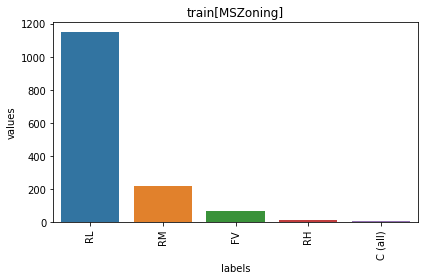

##################################################


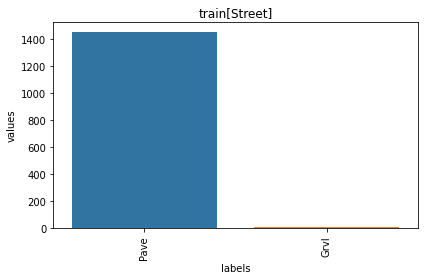

##################################################


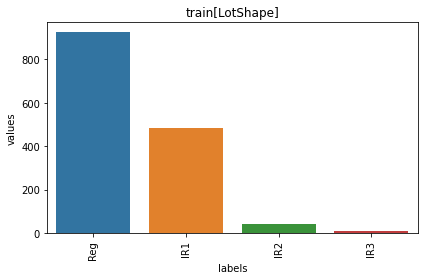

##################################################


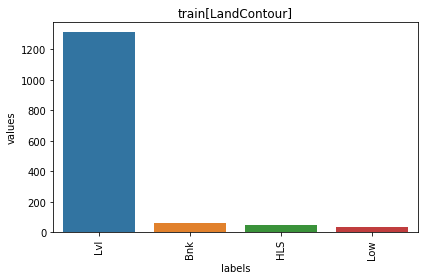

##################################################


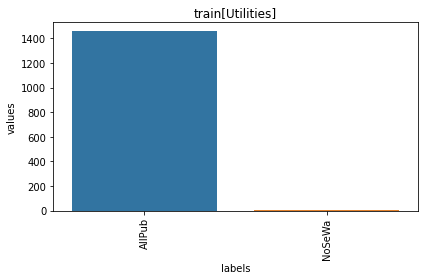

##################################################


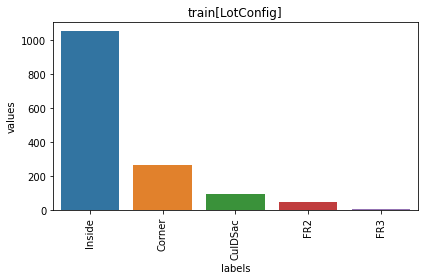

##################################################


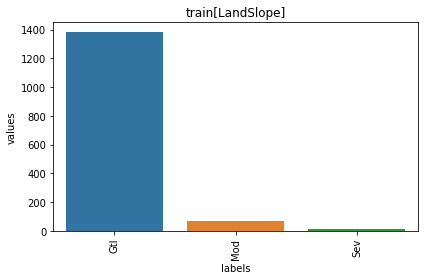

##################################################


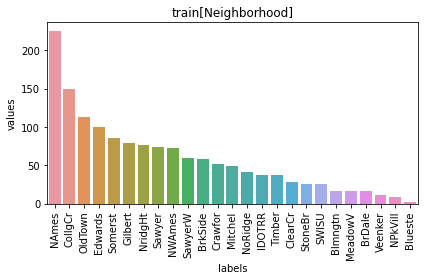

##################################################


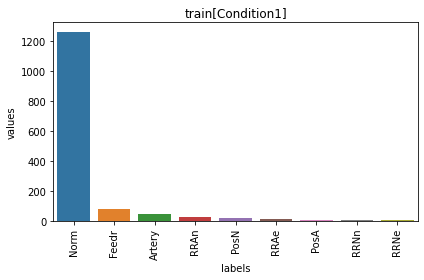

##################################################


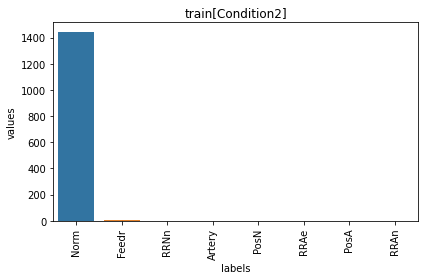

##################################################


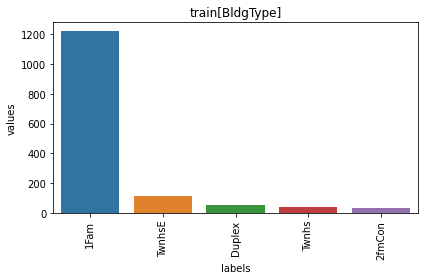

##################################################


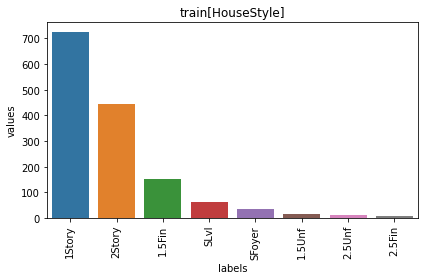

##################################################


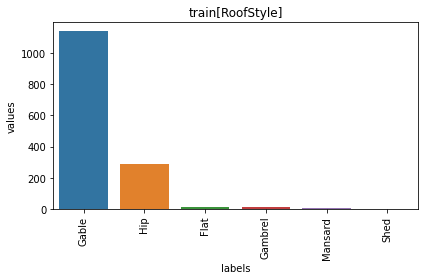

##################################################


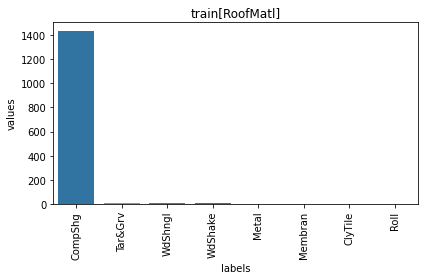

##################################################


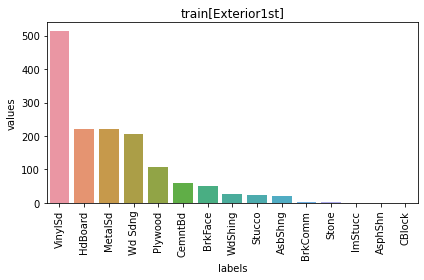

##################################################


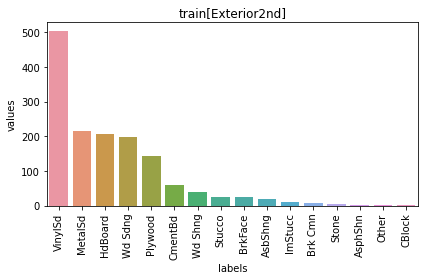

##################################################


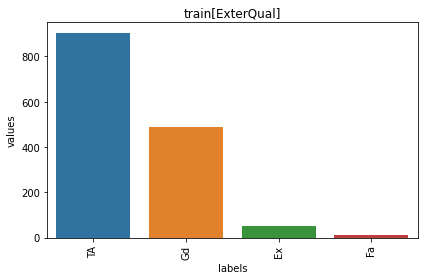

##################################################


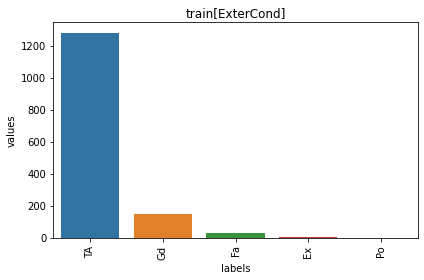

##################################################


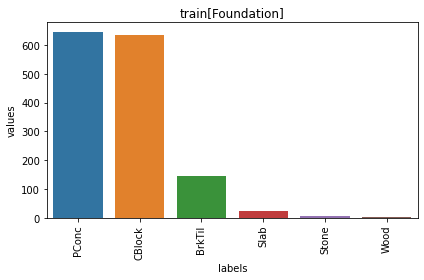

##################################################


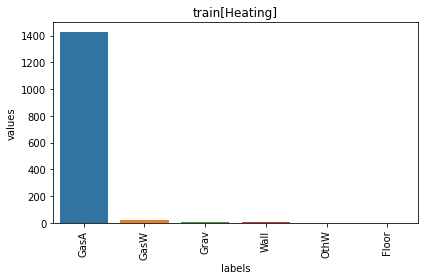

##################################################


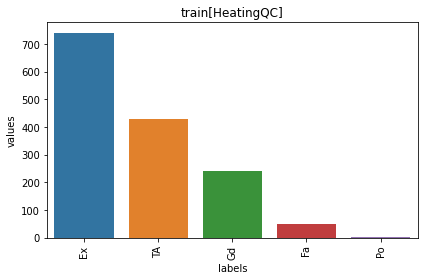

##################################################


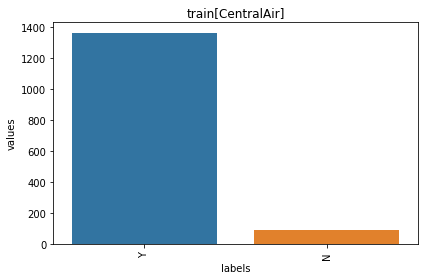

##################################################


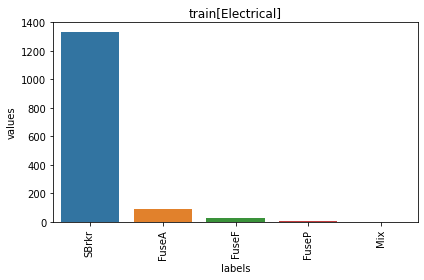

##################################################


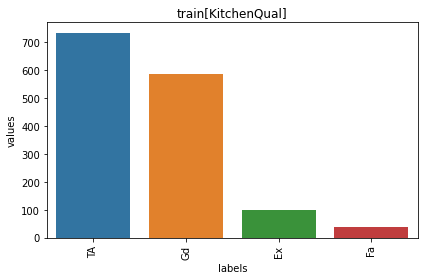

##################################################


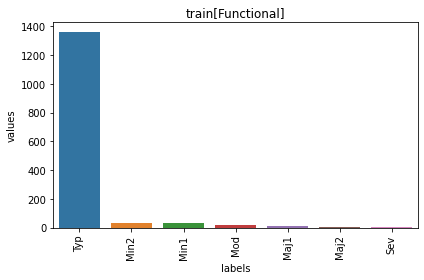

##################################################


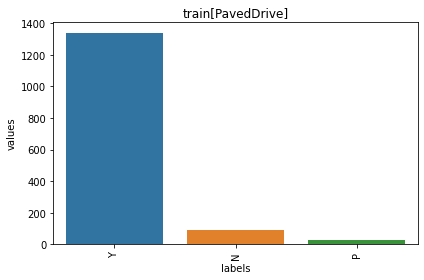

##################################################


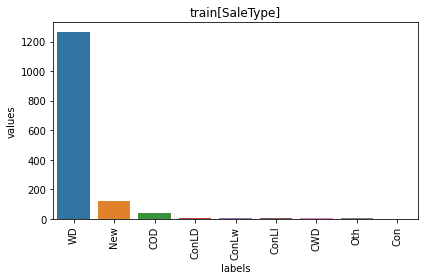

##################################################


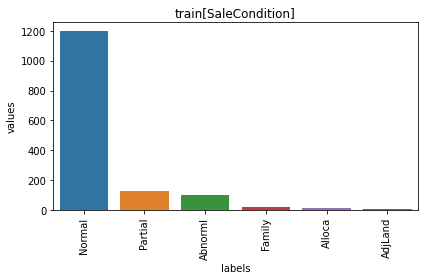

In [30]:
# カテゴリーデータの棒グラフ
for col in categorical_feats:
    temp = train[col].value_counts()
    df = pd.DataFrame({'labels': temp.index,
                       'values': temp.values
                      })
#     plt.figure(figsize=(5,5))
    plt.title('train[{}]'.format(col))
    sns.set_color_codes("pastel")
    sns.barplot(x = 'labels', y="values", data=df)
    plt.xticks(rotation=90)
    
    print('#'*50)

    plt.tight_layout()
    plt.show()

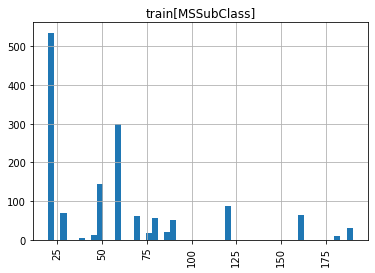

##################################################


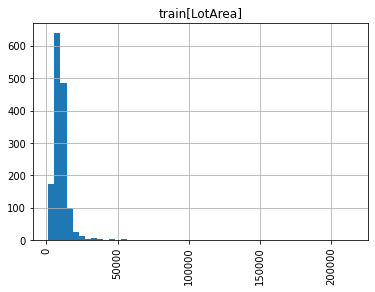

##################################################


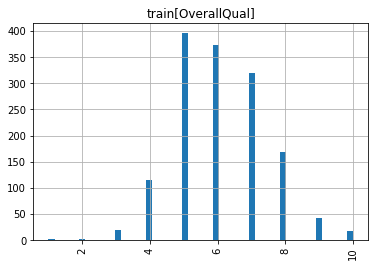

##################################################


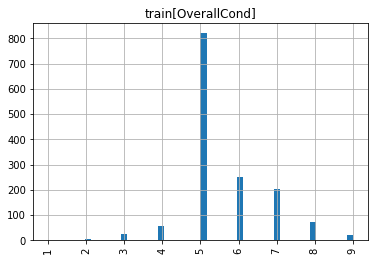

##################################################


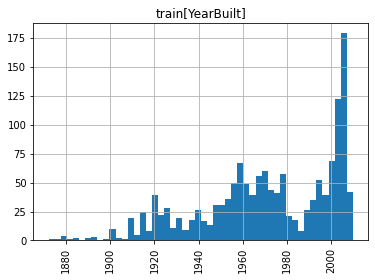

##################################################


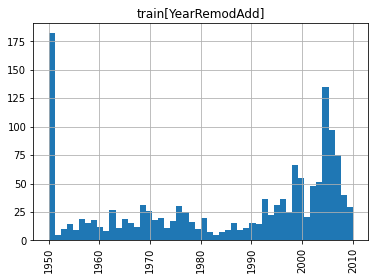

##################################################


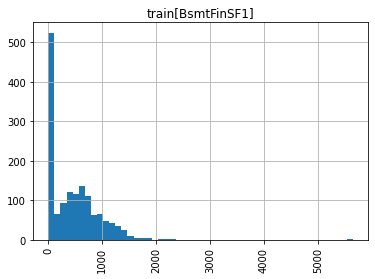

##################################################


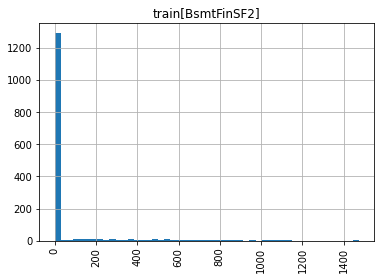

##################################################


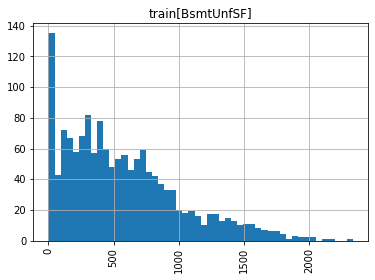

##################################################


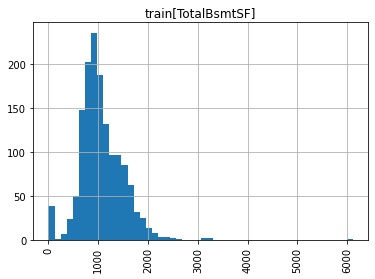

##################################################


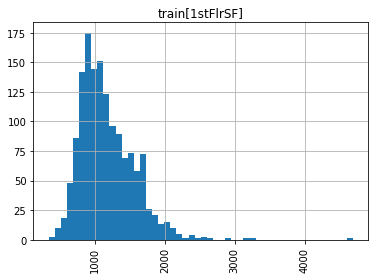

##################################################


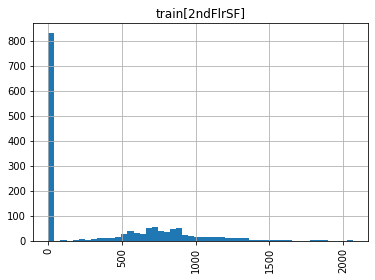

##################################################


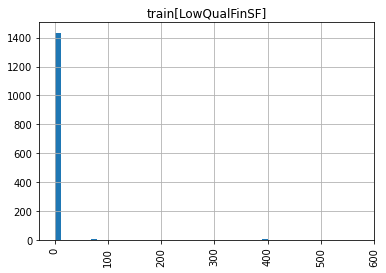

##################################################


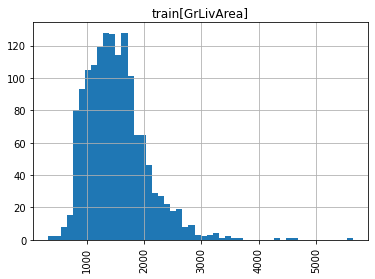

##################################################


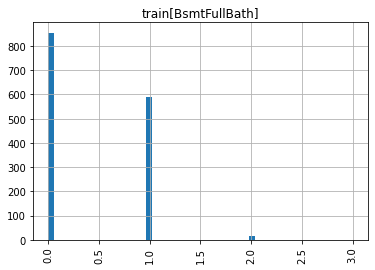

##################################################


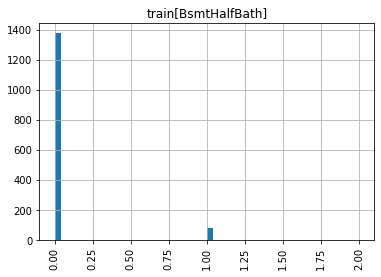

##################################################


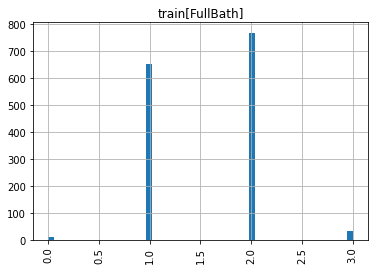

##################################################


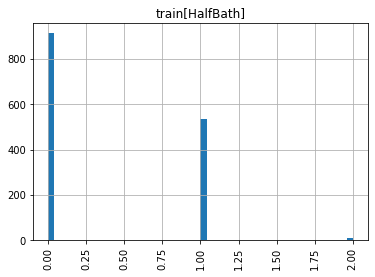

##################################################


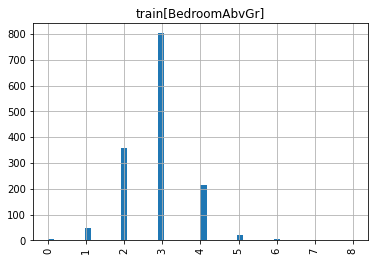

##################################################


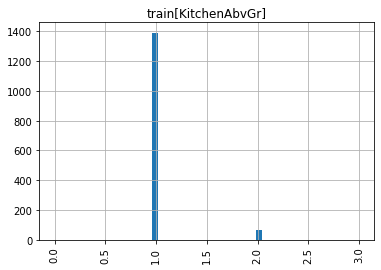

##################################################


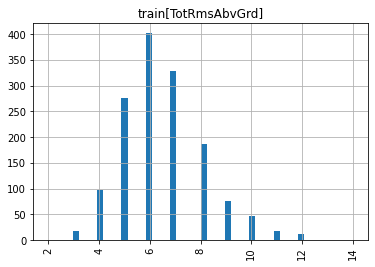

##################################################


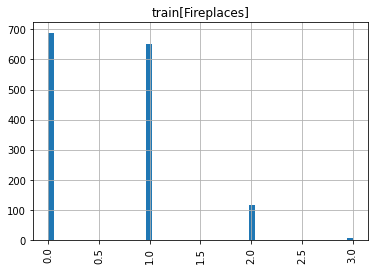

##################################################


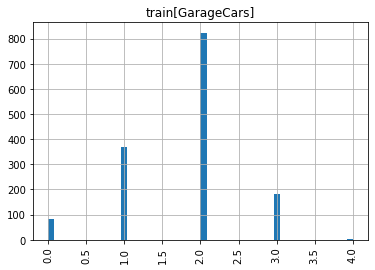

##################################################


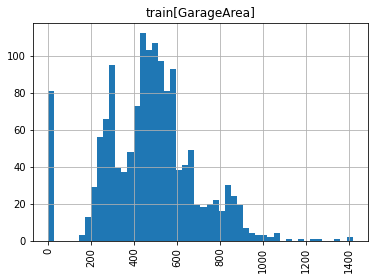

##################################################


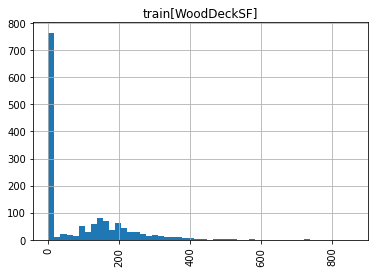

##################################################


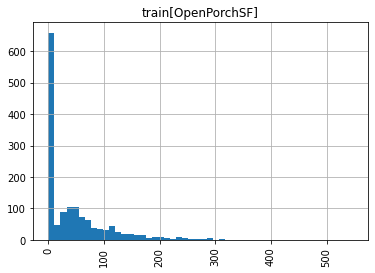

##################################################


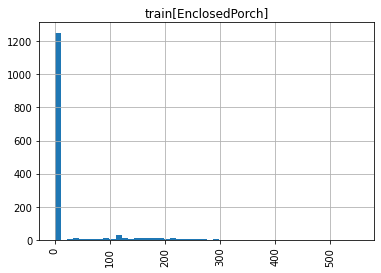

##################################################


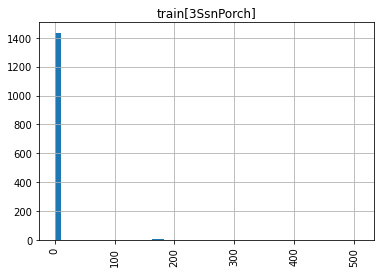

##################################################


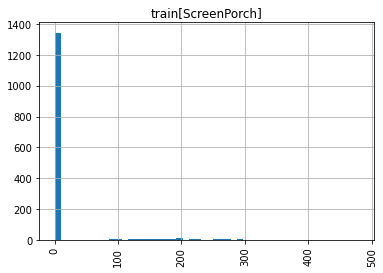

##################################################


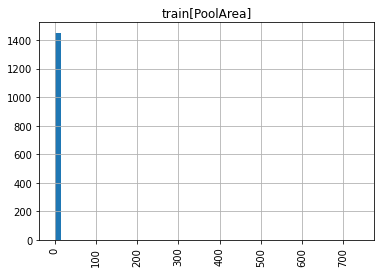

##################################################


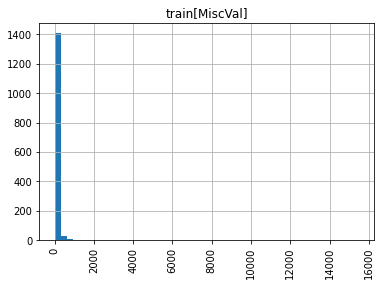

##################################################


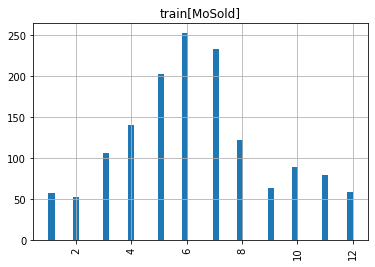

##################################################


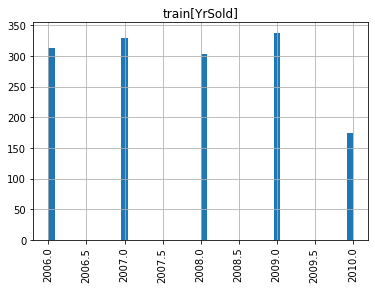

##################################################


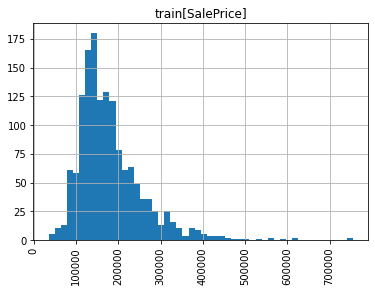

##################################################


In [31]:
# 数値データの分布
for col in numerical_feats:
    plt.title('train[{}]'.format(col))
    train[col].hist(bins=50)
    plt.xticks(rotation=90)
    plt.show()
    
    print('#'*50)

<AxesSubplot:>

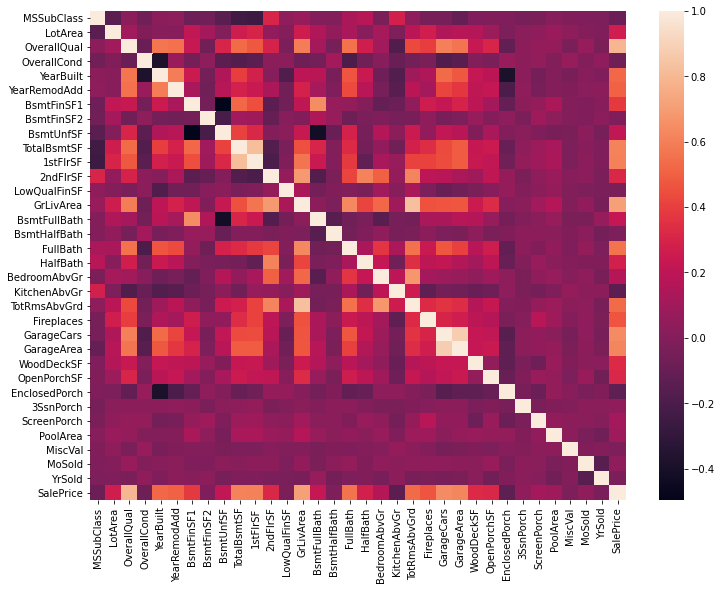

In [32]:
# 相関確認
plt.figure(figsize=(12, 9))
sns.heatmap(train.corr())

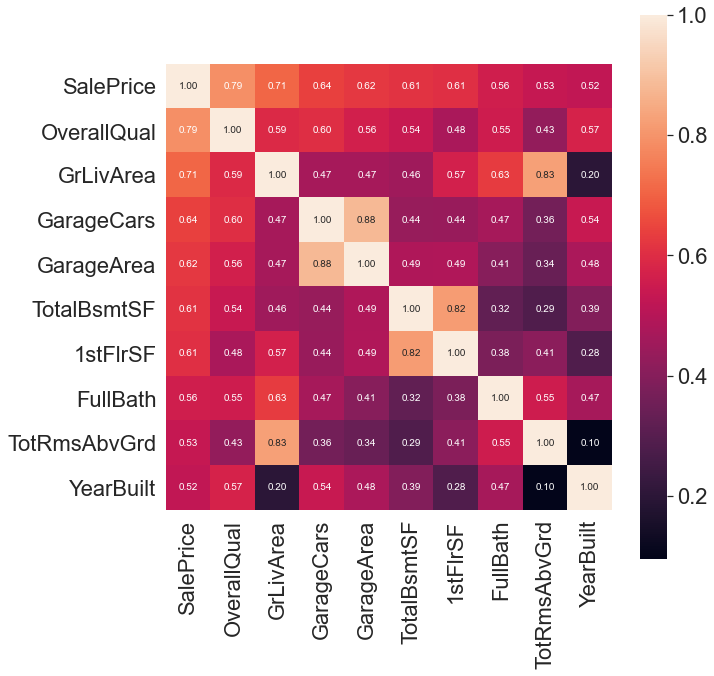

In [33]:
k = 10
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

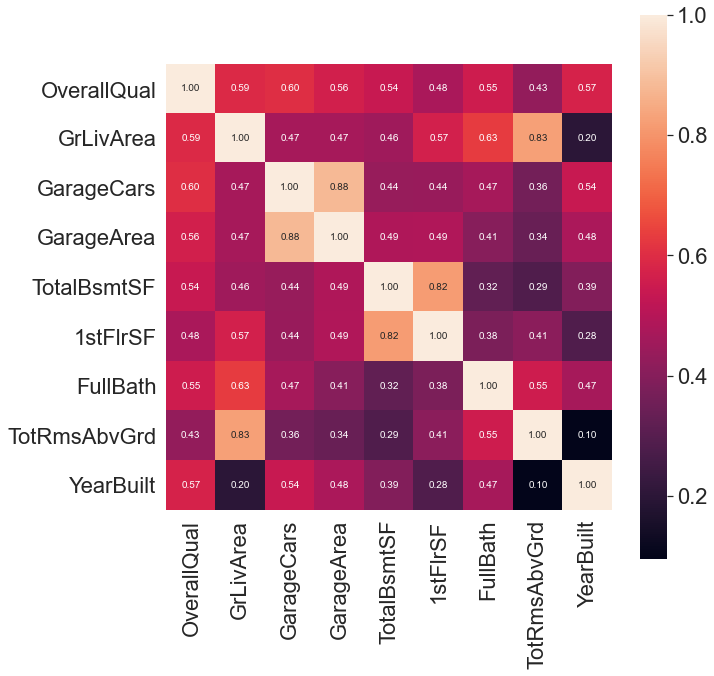

In [34]:
# SalePrice以外の相関で多重共線性がないか確認
a = list(cols)
a.remove('SalePrice')
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
hm = sns.heatmap(train[a].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})
plt.show()

In [35]:
train['total_area'] = train['GrLivArea'] + train['TotRmsAbvGrd']
train.drop('GarageArea', axis=1, inplace=True)
train.drop('GrLivArea', axis=1, inplace=True)
train.drop('TotRmsAbvGrd', axis=1, inplace=True)
train.drop('1stFlrSF', axis=1, inplace=True)

In [36]:
good_feats = ['SalePrice', 'total_area', 'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt']

In [37]:
# 対数変換の為に、再度データ分割
numerical_feats = train.dtypes[train.dtypes != 'object'].index
categorical_feats = train.dtypes[train.dtypes == 'object'].index

print(numerical_feats, len(numerical_feats))
print(categorical_feats, len(categorical_feats))

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'total_area'],
      dtype='object') 31
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object') 28


In [38]:
# 各特徴量に対して対数変換を行う
# for col in numerical_feats:
#     print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(train[col].skew()), 'Kurtosis: {:06.2f}'.format(train[col].kurt()))

In [39]:
# 最後にダミー変数を作る
train = pd.get_dummies(train)
train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,0,0,0,1,0,0,0,0,1,0


In [40]:
# 学習・評価していく
result_df, dt_importance, rf_importance = all_regression(train)

/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
result_df

,MSE
LinearRegression,1.091513e+09
SVM,7.825194e+09
DecisionTree,1.898335e+09
RandomForest,1.018560e+09


In [42]:
dt_importance.shape

(217,)

In [43]:
rf_importance

array([1.46585356e-03, 1.58687114e-02, 5.57712974e-01, 4.39793818e-03,
       1.67949807e-02, 9.62182942e-03, 3.13440325e-02, 9.81734359e-04,
       8.16727396e-03, 5.73378558e-02, 2.47541482e-02, 2.59614125e-04,
       1.84540914e-03, 5.65067743e-04, 4.40227308e-03, 1.21893045e-03,
       2.31477971e-03, 6.72830942e-04, 1.01683692e-02, 3.04023516e-02,
       5.09189701e-03, 5.25761863e-03, 1.02249577e-03, 9.44113171e-04,
       1.05554559e-03, 4.31747076e-04, 1.11344821e-04, 3.59763264e-03,
       1.82770751e-03, 1.44338155e-01, 3.28729248e-04, 1.08528713e-04,
       2.81647148e-06, 5.93873445e-04, 1.69036560e-03, 5.97179354e-06,
       1.09526331e-06, 1.32595264e-03, 9.29899124e-04, 3.81898806e-04,
       1.51083288e-03, 2.00215132e-04, 1.95529148e-04, 1.30990464e-04,
       4.83197771e-04, 0.00000000e+00, 0.00000000e+00, 6.41177172e-04,
       3.66062333e-04, 1.58294837e-04, 1.00467465e-04, 6.85454388e-04,
       1.42663314e-03, 4.10136276e-04, 1.19604805e-04, 3.20598452e-05,
      

In [44]:
train_feat = list(train.columns)

In [45]:
train_feat.remove('SalePrice')

In [46]:
result = pd.DataFrame([rf_importance, train_feat]).T
result.columns = ['importances', 'features']

In [47]:
result.sort_values(by='importances', ascending=False, inplace=True)

In [48]:
result

,importances,features
2,0.557713,OverallQual
29,0.144338,total_area
9,0.0573379,TotalBsmtSF
6,0.031344,BsmtFinSF1
19,0.0304024,GarageCars
...,...,...
46,0,Utilities_NoSeWa
148,0,Exterior2nd_Other
134,0,Exterior1st_Stone
131,0,Exterior1st_ImStucc


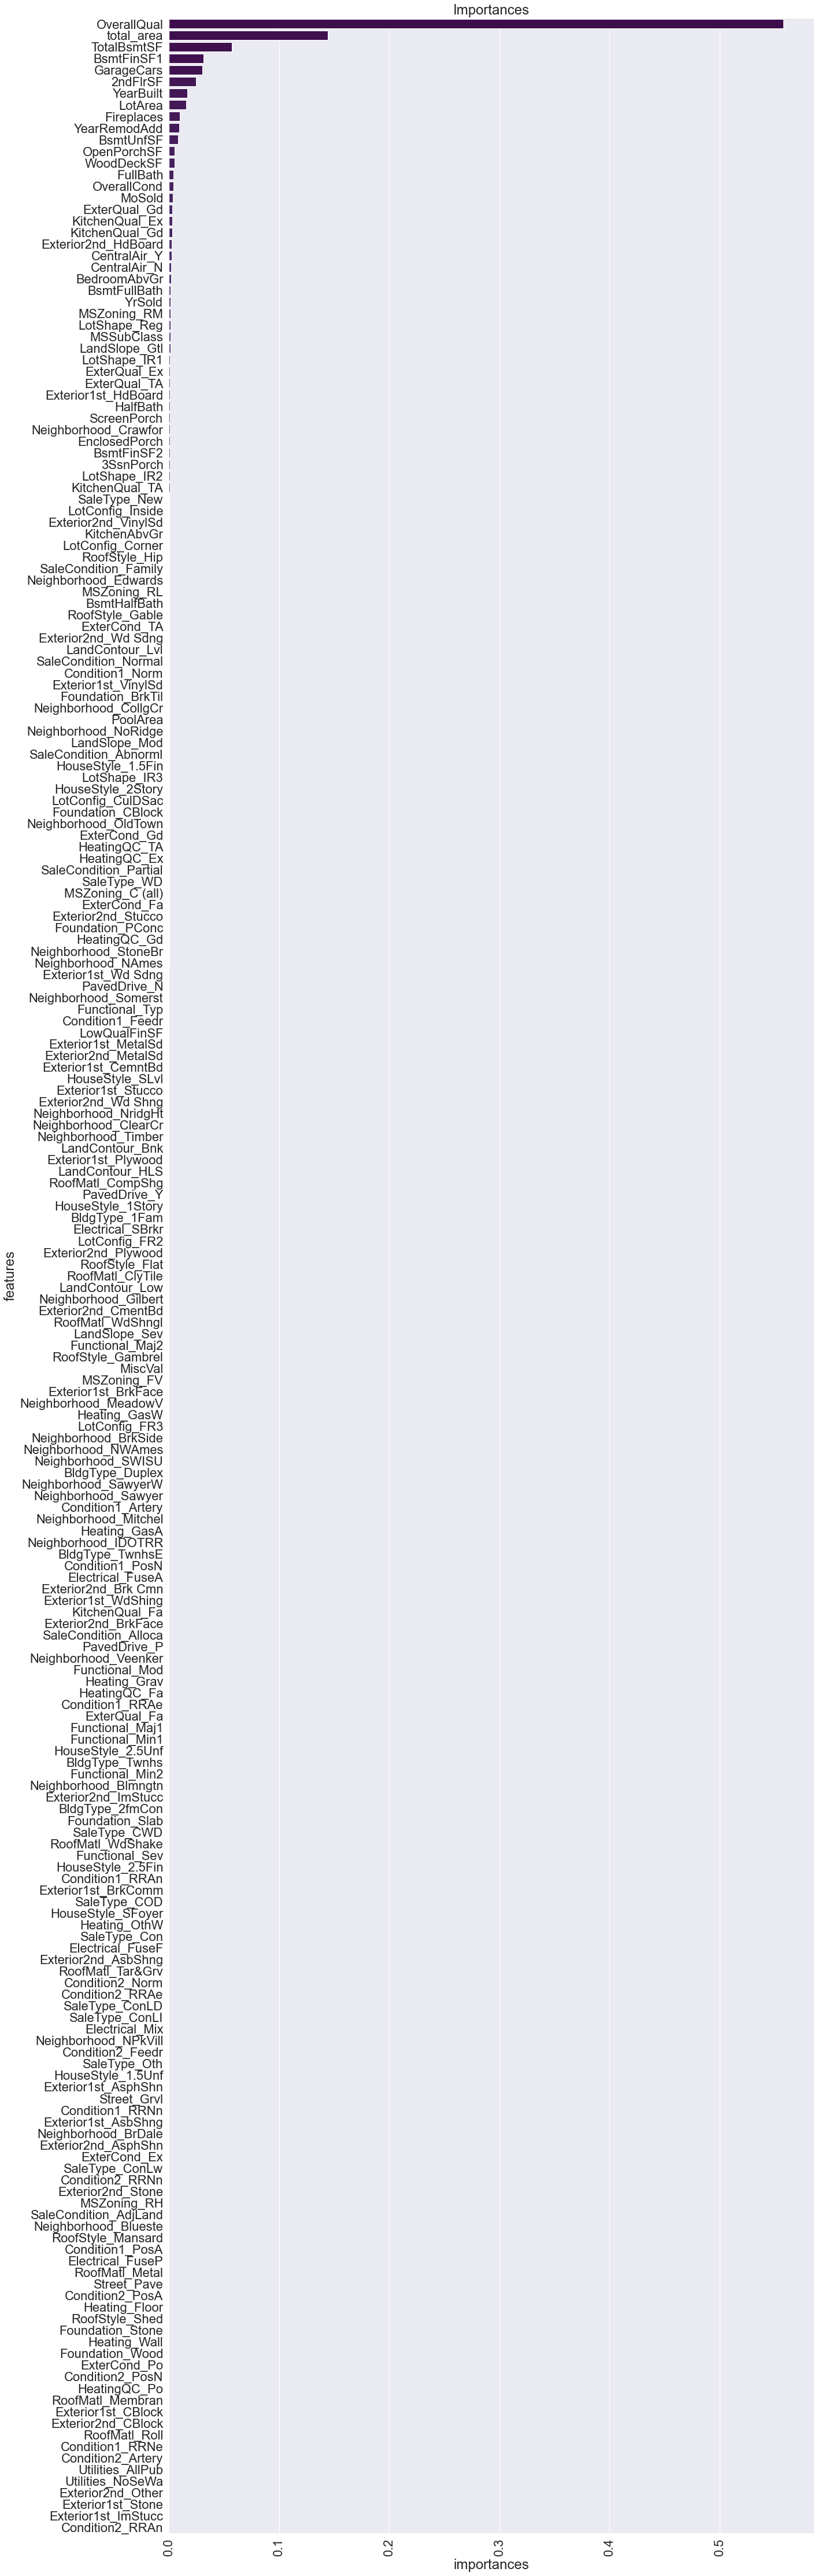

In [49]:
plt.figure(figsize=(20,80))
plt.title('Importances')
# plt.rcParams['font.size']=10
sns.barplot(y=result['features'], x=result['importances'], palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [50]:
no_feats = result.loc[result['importances'] < 0.01, 'features']

In [51]:
list(no_feats)

['YearRemodAdd',
 'BsmtUnfSF',
 'OpenPorchSF',
 'WoodDeckSF',
 'FullBath',
 'OverallCond',
 'MoSold',
 'ExterQual_Gd',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'Exterior2nd_HdBoard',
 'CentralAir_Y',
 'CentralAir_N',
 'BedroomAbvGr',
 'BsmtFullBath',
 'YrSold',
 'MSZoning_RM',
 'LotShape_Reg',
 'MSSubClass',
 'LandSlope_Gtl',
 'LotShape_IR1',
 'ExterQual_Ex',
 'ExterQual_TA',
 'Exterior1st_HdBoard',
 'HalfBath',
 'ScreenPorch',
 'Neighborhood_Crawfor',
 'EnclosedPorch',
 'BsmtFinSF2',
 '3SsnPorch',
 'LotShape_IR2',
 'KitchenQual_TA',
 'SaleType_New',
 'LotConfig_Inside',
 'Exterior2nd_VinylSd',
 'KitchenAbvGr',
 'LotConfig_Corner',
 'RoofStyle_Hip',
 'SaleCondition_Family',
 'Neighborhood_Edwards',
 'MSZoning_RL',
 'BsmtHalfBath',
 'RoofStyle_Gable',
 'ExterCond_TA',
 'Exterior2nd_Wd Sdng',
 'LandContour_Lvl',
 'SaleCondition_Normal',
 'Condition1_Norm',
 'Exterior1st_VinylSd',
 'Foundation_BrkTil',
 'Neighborhood_CollgCr',
 'PoolArea',
 'Neighborhood_NoRidge',
 'LandSlope_Mod',
 'SaleCo

In [52]:
train_ver2 = train.drop(columns=no_feats, axis=1)
train_ver2

,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,Fireplaces,GarageCars,SalePrice,total_area
0,8450,7,2003,706,856,854,0,2,208500,1718
1,9600,6,1976,978,1262,0,1,2,181500,1268
2,11250,7,2001,486,920,866,1,2,223500,1792
3,9550,7,1915,216,756,756,1,3,140000,1724
4,14260,8,2000,655,1145,1053,1,3,250000,2207
...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,0,953,694,1,2,175000,1654
1456,13175,6,1978,790,1542,0,2,2,210000,2080
1457,9042,7,1941,275,1152,1152,2,1,266500,2349
1458,9717,5,1950,49,1078,0,0,1,142125,1083


In [53]:
# 再度学習・評価していく
result_df2, dt_importance, rf_importance = all_regression(train_ver2)

/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
result_df2

,MSE
LinearRegression,2.245102e+09
SVM,7.009214e+09
DecisionTree,1.880899e+09
RandomForest,9.336443e+08


これらのEDA及び現在の手法ではむしろ精度が悪くなってしまっている。<br>
まだハイパーパラメータを調整したりしてはいないが、そう言う問題の結果ではないように思う。<br>
一旦ここで提出とするが、次の講義までに精度向上に取り組んでいきたい。<br>

In [55]:
log_feat = ['LotArea', 'TotalBsmtSF', 'SalePrice', 'total_area']
train_ver2[log_feat] = train_ver2[log_feat].apply(np.log)
train_ver2

,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,Fireplaces,GarageCars,SalePrice,total_area
0,9.041922,7,2003,706,6.752270,854,0,2,12.247694,7.448916
1,9.169518,6,1976,978,7.140453,0,1,2,12.109011,7.145196
2,9.328123,7,2001,486,6.824374,866,1,2,12.317167,7.491088
3,9.164296,7,1915,216,6.628041,756,1,3,11.849398,7.452402
4,9.565214,8,2000,655,7.043160,1053,1,3,12.429216,7.699389
...,...,...,...,...,...,...,...,...,...,...
1455,8.976768,6,1999,0,6.859615,694,1,2,12.072541,7.410952
1456,9.486076,6,1978,790,7.340836,0,2,2,12.254863,7.640123
1457,9.109636,7,1941,275,7.049255,1152,2,1,12.493130,7.761745
1458,9.181632,5,1950,49,6.982863,0,0,1,11.864462,6.987490


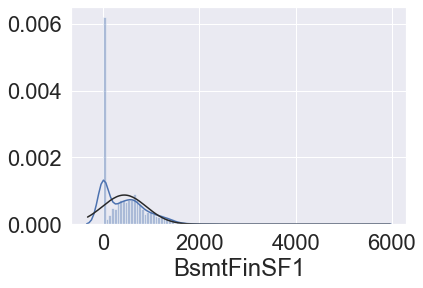

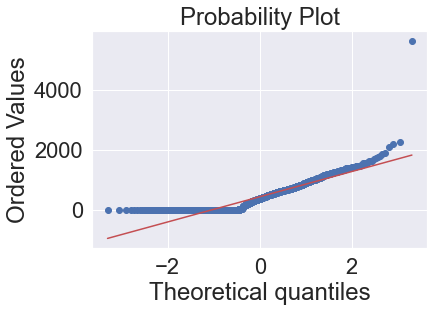

In [56]:
sns.distplot(train_ver2['BsmtFinSF1'], bins=100, fit=norm)
fig = plt.figure()
res = stats.probplot(train_ver2['BsmtFinSF1'], plot=plt)

In [57]:
train_ver2['BsmtFinSF1'] = train_ver2[train_ver2['BsmtFinSF1'] > 0].apply(np.log)
train_ver2

,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,Fireplaces,GarageCars,SalePrice,total_area
0,9.041922,7,2003,2.201872,6.752270,854,0,2,12.247694,7.448916
1,9.169518,6,1976,2.215885,7.140453,0,1,2,12.109011,7.145196
2,9.328123,7,2001,2.233034,6.824374,866,1,2,12.317167,7.491088
3,9.164296,7,1915,2.215315,6.628041,756,1,3,11.849398,7.452402
4,9.565214,8,2000,2.258133,7.043160,1053,1,3,12.429216,7.699389
...,...,...,...,...,...,...,...,...,...,...
1455,8.976768,6,1999,NaN,6.859615,694,1,2,12.072541,7.410952
1456,9.486076,6,1978,2.249825,7.340836,0,2,2,12.254863,7.640123
1457,9.109636,7,1941,2.209333,7.049255,1152,2,1,12.493130,7.761745
1458,9.181632,5,1950,2.217205,6.982863,0,0,1,11.864462,6.987490


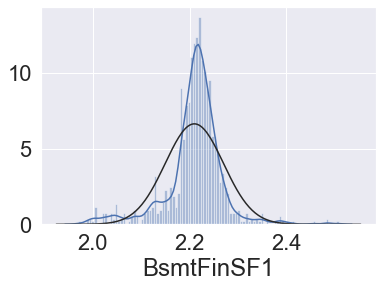

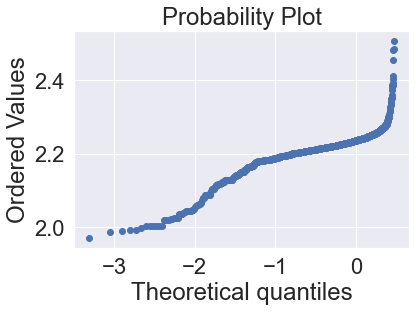

In [58]:
sns.distplot(train_ver2['BsmtFinSF1'], bins=100, fit=norm)
fig = plt.figure()
res = stats.probplot(train_ver2['BsmtFinSF1'], plot=plt)

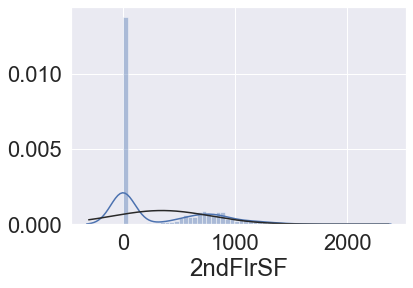

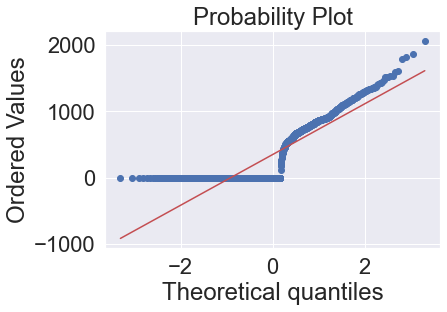

In [59]:
sns.distplot(train_ver2['2ndFlrSF'], bins=50, fit=norm)
fig = plt.figure()
res = stats.probplot(train_ver2['2ndFlrSF'], plot=plt)

In [60]:
train_ver2['2ndFlrSF'] = train_ver2[train_ver2['2ndFlrSF'] > 0].apply(np.log)
train_ver2

,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,Fireplaces,GarageCars,SalePrice,total_area
0,9.041922,7,2003,2.201872,6.752270,2.201872,0,2,12.247694,7.448916
1,9.169518,6,1976,2.215885,7.140453,NaN,1,2,12.109011,7.145196
2,9.328123,7,2001,2.233034,6.824374,2.233034,1,2,12.317167,7.491088
3,9.164296,7,1915,2.215315,6.628041,2.215315,1,3,11.849398,7.452402
4,9.565214,8,2000,2.258133,7.043160,2.258133,1,3,12.429216,7.699389
...,...,...,...,...,...,...,...,...,...,...
1455,8.976768,6,1999,NaN,6.859615,2.194640,1,2,12.072541,7.410952
1456,9.486076,6,1978,2.249825,7.340836,NaN,2,2,12.254863,7.640123
1457,9.109636,7,1941,2.209333,7.049255,2.209333,2,1,12.493130,7.761745
1458,9.181632,5,1950,2.217205,6.982863,NaN,0,1,11.864462,6.987490


In [61]:
# 対数変換で欠損値発生→平均で穴埋め
train_ver2.isnull().sum()

LotArea          0
OverallQual      0
YearBuilt        0
BsmtFinSF1     466
TotalBsmtSF      0
2ndFlrSF       829
Fireplaces       0
GarageCars       0
SalePrice        0
total_area       0
dtype: int64

In [62]:
# 欠損値なくなったので再度学習・評価
train_ver2.fillna(train_ver2.mean(), inplace=True)
train_ver2.max()

LotArea          12.279532
OverallQual      10.000000
YearBuilt      2010.000000
BsmtFinSF1        2.507934
TotalBsmtSF       8.717682
2ndFlrSF          2.485876
Fireplaces        3.000000
GarageCars        4.000000
SalePrice        13.534473
total_area        8.640119
dtype: float64

In [63]:
train_ver3 = train_ver2.reset_index(drop=True)
train_ver3

,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,Fireplaces,GarageCars,SalePrice,total_area
0,9.041922,7,2003,2.201872,6.752270,2.201872,0,2,12.247694,7.448916
1,9.169518,6,1976,2.215885,7.140453,2.205405,1,2,12.109011,7.145196
2,9.328123,7,2001,2.233034,6.824374,2.233034,1,2,12.317167,7.491088
3,9.164296,7,1915,2.215315,6.628041,2.215315,1,3,11.849398,7.452402
4,9.565214,8,2000,2.258133,7.043160,2.258133,1,3,12.429216,7.699389
...,...,...,...,...,...,...,...,...,...,...
1454,8.976768,6,1999,2.209758,6.859615,2.194640,1,2,12.072541,7.410952
1455,9.486076,6,1978,2.249825,7.340836,2.205405,2,2,12.254863,7.640123
1456,9.109636,7,1941,2.209333,7.049255,2.209333,2,1,12.493130,7.761745
1457,9.181632,5,1950,2.217205,6.982863,2.205405,0,1,11.864462,6.987490


In [64]:
train_ver3[train_ver3['TotalBsmtSF'] == float('-inf')] = 0

In [65]:
train_ver3

,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,Fireplaces,GarageCars,SalePrice,total_area
0,9.041922,7,2003,2.201872,6.752270,2.201872,0,2,12.247694,7.448916
1,9.169518,6,1976,2.215885,7.140453,2.205405,1,2,12.109011,7.145196
2,9.328123,7,2001,2.233034,6.824374,2.233034,1,2,12.317167,7.491088
3,9.164296,7,1915,2.215315,6.628041,2.215315,1,3,11.849398,7.452402
4,9.565214,8,2000,2.258133,7.043160,2.258133,1,3,12.429216,7.699389
...,...,...,...,...,...,...,...,...,...,...
1454,8.976768,6,1999,2.209758,6.859615,2.194640,1,2,12.072541,7.410952
1455,9.486076,6,1978,2.249825,7.340836,2.205405,2,2,12.254863,7.640123
1456,9.109636,7,1941,2.209333,7.049255,2.209333,2,1,12.493130,7.761745
1457,9.181632,5,1950,2.217205,6.982863,2.205405,0,1,11.864462,6.987490


In [66]:
result_df3, dt_importance, rf_importance = all_regression(train_ver3)
result_df3

/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MSE
LinearRegression,0.023819
SVM,0.111644
DecisionTree,0.042422
RandomForest,0.026753


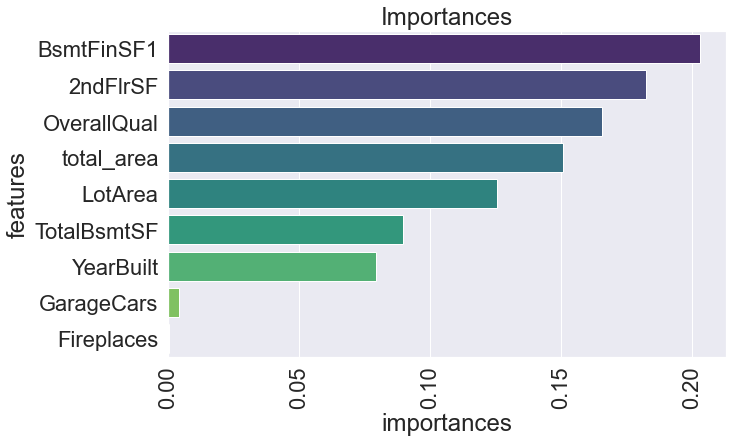

In [73]:
train_feat = list(train_ver3.columns)
train_feat.remove('SalePrice')
result = pd.DataFrame([rf_importance, train_feat]).T
result.columns = ['importances', 'features']
result.sort_values(by='importances', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
plt.title('Importances')
# plt.rcParams['font.size']=10
sns.barplot(y=result['features'], x=result['importances'], palette='viridis')
plt.xticks(rotation=90)
plt.show()